
Nama            : Dyah Ayu Kusuma Wardhani

Kelas           : PYTN KS 019

Kode Peserta    : PYTN-KS19-02

# **ASSIGMENT 2**

Pada assigment 2, tugasnya adalah lakukan metode statistik kepada dataset, seperti Central Tendencies, Interval, Hypotesis Testing dan semua metode statistik yang telah dipelajari

Sumber Data : https://www.kaggle.com/datasets/new-york-city/nyc-property-sales

# **A. IMPORT LIBRARY**
----------------------------------------------

In [1]:
import math
import statistics
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Math, Latex     #untuk menulis markdown persamaan matematika
%matplotlib inline
import seaborn

# **B. DATA COLLECTION**
-------------------------------------

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv')
pd.set_option('display.max.columns',None)

df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


Dataset ini berisi tentang catatan penjualan properti di New York selama periode 12 bulan, terkait harga properti tersebut terjual, berisi lokasi, alamat, jenis, harga jual, dan tanggal penjualan unit bangunan yang terjual. Referensi di bidang yang lebih rumit:
- `BOROUGH`: Kode digit untuk borough tempat properti berada; dalam urutan ini adalah Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5)
- `BLOCK; LOT`: Kombinasi borough, block, dan lot membentuk kunci unik untuk properti di New York City. Biasa disebut BBL.
- `BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE`: Jenis bangunan pada berbagai titik waktu


# **C. DATA EXPLORATION**
----------------------------------------

In [3]:
# Melihat jumlah baris dan kolom data
df.shape

(84548, 22)

In [4]:
# Melihat type data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

Data ini memiliki **22 kolom dan 84548 baris**, dengan tipe data object dan integer.

In [5]:
# Melihat 5 data teratas
df.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [6]:
# Melihat 5 data terbawah
df.tail(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [7]:
# Melihat list header kolom
df.columns.values

array(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

# **D. DATA CLEANING & PREPROCESSING**
___________________________________________________________

## 1. Menghapus kolom yang tidak di butuhkan

In [8]:
df.drop(['Unnamed: 0', 'BLOCK', 'LOT', 'EASE-MENT', 'APARTMENT NUMBER','ADDRESS','ZIP CODE'
         , 'BUILDING CLASS AT PRESENT','BUILDING CLASS AT TIME OF SALE'], axis=1,inplace=True)

## 2. Mengubah index pada borough


In [9]:
# Mapping pada kolom BOROUGH, karena masih berupa kategori angka, maka akan diubah masing-masing angka berdasarkan nama borough pada angka tersebut.
df['BOROUGH'] = df['BOROUGH'].map({1: 'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens', 5:'Staten Island'})
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,5,0,5,1633,6440,1900,2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,28,3,31,4616,18690,1900,2,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,16,1,17,2212,7803,1900,2,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,10,0,10,2272,6794,1913,2,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,6,0,6,2369,4615,1900,2,8000000,2016-11-17 00:00:00


## 3. Mengubah tipe data yang belum sesuai

In [10]:
df.dtypes

BOROUGH                      object
NEIGHBORHOOD                 object
BUILDING CLASS CATEGORY      object
TAX CLASS AT PRESENT         object
RESIDENTIAL UNITS             int64
COMMERCIAL UNITS              int64
TOTAL UNITS                   int64
LAND SQUARE FEET             object
GROSS SQUARE FEET            object
YEAR BUILT                    int64
TAX CLASS AT TIME OF SALE     int64
SALE PRICE                   object
SALE DATE                    object
dtype: object

In [11]:
# Mengubah tipe data pada kolom 'SALE DATE'
df['SALE DATE']= pd.to_datetime(df['SALE DATE'])

In [12]:
# Mengubah tipe data pada kolom 'land square feet','gross square feet','sale price'
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors= 'coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df.dtypes

BOROUGH                              object
NEIGHBORHOOD                         object
BUILDING CLASS CATEGORY              object
TAX CLASS AT PRESENT                 object
RESIDENTIAL UNITS                     int64
COMMERCIAL UNITS                      int64
TOTAL UNITS                           int64
LAND SQUARE FEET                    float64
GROSS SQUARE FEET                   float64
YEAR BUILT                            int64
TAX CLASS AT TIME OF SALE             int64
SALE PRICE                          float64
SALE DATE                    datetime64[ns]
dtype: object

## 4. Memeriksa Apakah Terdapat Missing Value pada Dataset

In [13]:
df.isnull().sum()

BOROUGH                          0
NEIGHBORHOOD                     0
BUILDING CLASS CATEGORY          0
TAX CLASS AT PRESENT             0
RESIDENTIAL UNITS                0
COMMERCIAL UNITS                 0
TOTAL UNITS                      0
LAND SQUARE FEET             26252
GROSS SQUARE FEET            27612
YEAR BUILT                       0
TAX CLASS AT TIME OF SALE        0
SALE PRICE                   14561
SALE DATE                        0
dtype: int64

Sekarang, data type sudah sesuai. Namun ternyata masih banyak kolom yang memiliki nilai 0. Oleh karena itu, saya menggunakan keterangan sebagai berikut.

- Untuk kolom `residential units, commercial units, dan total units` : nilai 0 tidak diganti dengan apapun karena nilainya saling berketerkaitan.
- Untuk kolom ``land square feet, dan gross square feet`` : nilai NaN dihapus karena saya mengasumsikan jika nilainya Nan maka daerah tersebut tidak memiliki lahan tanah maupun rumput.
- ``Sale price`` : nilai 0 akan diganti dengan median pada kolom tersebut

In [14]:
#Menghapus nilai Nan pada kolom 'LAND SQUARE FEET' dan 'GROSS SQUARE FEET'
df = df.dropna(subset=['LAND SQUARE FEET', 'GROSS SQUARE FEET'])


In [15]:
# Melihat presentase nilai Nan pada setiap kolom
df_NaN = round((df.isnull().sum())/len(df)*100, 2)
df_NaN = pd.DataFrame(df_NaN)
df_NaN = df_NaN.rename(columns={0:'missing_value_percentage'})
df_NaN

,missing_value_percentage
BOROUGH,0.00
NEIGHBORHOOD,0.00
BUILDING CLASS CATEGORY,0.00
TAX CLASS AT PRESENT,0.00
RESIDENTIAL UNITS,0.00
COMMERCIAL UNITS,0.00
TOTAL UNITS,0.00
LAND SQUARE FEET,0.00
GROSS SQUARE FEET,0.00
YEAR BUILT,0.00


In [16]:
# Menghitung nilai Median pada kolom "SALE PRICE"
SP_median = df['SALE PRICE'].median()
SP_median

480000.0

In [17]:
# Mengganti nilai Nan pada kolom 'SALE PRICE' menjadi nilai Median
df['SALE PRICE'].fillna(480000, inplace=True)
df

C:\Users\USER\AppData\Local\Temp\ipykernel_5420\475673248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SALE PRICE'].fillna(480000, inplace=True)


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,5,0,5,1633.0,6440.0,1900,2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,28,3,31,4616.0,18690.0,1900,2,480000.0,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,16,1,17,2212.0,7803.0,1900,2,480000.0,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,10,0,10,2272.0,6794.0,1913,2,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,6,0,6,2369.0,4615.0,1900,2,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,2,0,2,2400.0,2575.0,1998,1,450000.0,2016-11-28
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,2,0,2,2498.0,2377.0,1998,1,550000.0,2017-04-21
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,2,0,2,4000.0,1496.0,1925,1,460000.0,2017-07-05
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,0,7,7,208033.0,64117.0,2001,4,11693337.0,2016-12-21


In [18]:
df['SALE PRICE'].isna().sum()

0

In [19]:
df.duplicated().sum()

1266

In [20]:
df = df.drop_duplicates(df.columns)

df.duplicated().any()

False

## 5. Melihat informasi statistik

In [21]:
df.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,55664.000000,55664.000000,55664.000000,5.566400e+04,5.566400e+04,55664.000000,55664.000000,5.566400e+04,55664
mean,2.704207,0.257941,2.976286,3.552923e+03,3.890544e+03,1850.189889,1.434823,1.067301e+06,2017-02-24 22:04:37.321069312
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00,2016-09-01 00:00:00
25%,1.000000,0.000000,1.000000,1.652000e+03,1.060000e+03,1920.000000,1.000000,2.250750e+05,2016-11-29 00:00:00
50%,1.000000,0.000000,1.000000,2.304000e+03,1.683000e+03,1931.000000,1.000000,4.800000e+05,2017-02-24 00:00:00
75%,2.000000,0.000000,2.000000,3.450000e+03,2.560000e+03,1960.000000,2.000000,7.500000e+05,2017-05-25 00:00:00
max,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09,2017-08-31 00:00:00
std,19.396753,10.212459,22.069218,3.435132e+04,3.487999e+04,419.569940,0.812757,1.247130e+07,NaN


Berdasarkan output di atas maka dapat diketahui jumlah, rata-rata, standar deviasi, nilai minimum, kuartil 1-3, dan nilai maximum per kolom dataset yang digunakan

# **E. PENGOLAHAN DATA**
-----------------------------------------------------

## 1. **Measure of Central Tendency** (Mean, Median, Modus)

### a. Mean
#### - Mean Sale Price pada setiap Borough

In [22]:
mean = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').mean().sort_values(by='SALE PRICE', ascending=False)
mean

,SALE PRICE
BOROUGH,
Manhattan,1.150410e+07
Brooklyn,8.550940e+05
Queens,7.599055e+05
Bronx,6.061231e+05
Staten Island,5.159248e+05


__Insight :__<br>
Dari Analisis diatas dapat kita ketahui bahwa **Kota Manhattan** memiliki **rata-rata tertinggi** pada sale price.

#### - Mean Residential Units, Commercial Units, Total Units, Land Square Feet, Gross Square Feet, Sale Price berdasarkan Borough

In [23]:
meann = df[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 
            'SALE PRICE','BOROUGH']].groupby('BOROUGH').mean()
meann

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,
Bronx,3.368106,0.162387,3.535600,3966.193901,4551.152466,6.061231e+05
Brooklyn,2.024239,0.147016,2.204600,2037.240039,2509.748205,8.550940e+05
Manhattan,18.437118,2.525641,20.957875,5316.097680,33860.451770,1.150410e+07
Queens,2.394804,0.295587,2.689625,4224.637247,3269.041654,7.599055e+05
Staten Island,1.358014,0.095784,1.452769,6246.211841,2308.320846,5.159248e+05


__Insight:__<br>
Dari tabel di atas, dapat kita ketahui bahwa Manhattan memiliki rata-rata kolom tertinggi di antara wilayah lainnya

### b. Median

Median dari Sale Price pada setiap Borough


In [24]:
median = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').median().sort_values(by='SALE PRICE', ascending=False)
median

,SALE PRICE
BOROUGH,
Manhattan,1357500.0
Queens,480000.0
Staten Island,480000.0
Brooklyn,445000.0
Bronx,282500.0


__Insight:__<br>
Dari tabel di atas, dapat kita ketahui bahwa Bronx memiliki median sale price terendah, Manhattan memiliki median tertinggi.

### c. Modus

In [25]:
mode = df[['BOROUGH','TOTAL UNITS']].groupby(['BOROUGH']).apply(pd.DataFrame.mode).reset_index(drop=True)
mode

,BOROUGH,TOTAL UNITS
0,Bronx,1
1,Brooklyn,1
2,Manhattan,1
3,Queens,1
4,Staten Island,1


__Insight:__ <br>
Dari tabel di atas, dapat kita ketahui bahwa pada semua kota sebagain besar memiliki total 1 unit.

## 2. **Measure of Central Spread** (range, standard deviasi, variansi)

### a. Range
    Selisih antara max SALE PRICE dengan min Sale Price setiap wilayah

In [26]:
range1 = df.groupby('BOROUGH').apply(lambda x: x['SALE PRICE'].max() - x['SALE PRICE'].min())
range1

BOROUGH
Bronx            1.100000e+08
Brooklyn         3.450000e+08
Manhattan        2.210000e+09
Queens           2.575000e+08
Staten Island    1.190000e+07
dtype: float64

__Insight :__ <br> 
Semua borough mempunyai jangkauan yang tidak jauh berbeda

### b. Standard Deviation
    Standar deviation dari kolom 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET','SALE PRICE'

In [27]:
df[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 
            'SALE PRICE']].std()


RESIDENTIAL UNITS    1.939675e+01
COMMERCIAL UNITS     1.021246e+01
TOTAL UNITS          2.206922e+01
LAND SQUARE FEET     3.435132e+04
GROSS SQUARE FEET    3.487999e+04
SALE PRICE           1.247130e+07
dtype: float64

__Insight:__<br> 
Dari hasil di atas, kita mengetahui bahwa setiap kolom memiliki nilai standar deviasi  yang tidak terlalu tinggi, artinya data tidak memiliki sebaran yang besar

### c. Variansi
    Variasi dari kolom 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET','SALE PRICE'

In [28]:
df[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 
            'SALE PRICE']].var()

RESIDENTIAL UNITS    3.762340e+02
COMMERCIAL UNITS     1.042943e+02
TOTAL UNITS          4.870504e+02
LAND SQUARE FEET     1.180013e+09
GROSS SQUARE FEET    1.216613e+09
SALE PRICE           1.555332e+14
dtype: float64

**Insight:**<br>
Dari hasil di atas, kita mengetahui bahwa setiap kolom memiliki nilai varians  yang tidak terlalu tinggi, artinya data tidak memiliki sebaran yang besar

## 3. **Probability Distribution** (Uniform Distribution, Normal Distribution, Gamma Distribution, Eksponensial Distribution, Poisson Distribution) pada kolom SALE PRICE

Probability distribution adalah fungsi di bawah teori dan statistik probabilitas yang memberi kita seberapa besar kemungkinan hasil yang berbeda dalam sebuah eksperimen.<br>
Beberapa jenis probability distribution dan penggambarannya adalah sebagai berikut.



### a. Uniform Distribution

Adalah bentuk distribusi probabilitas di mana suatu peristiwa memiliki kemungkinan yang sama untuk terjadi dalam interval tertentu.<br>
Rumus fungsi data berdistribusi uniform sebagai berikut. <br>
    
$f(x) = \begin{cases}
\frac{1}{b-a}, \hspace{0.4cm} a \leq x \leq b \\
0, \hspace{0.7cm} other.
\end{cases}$
    
dengan <br>
$f(x)$ = Fungsi Kepadatan Probabilitas (FKP) <br>
a = batas atas<br>
b = batas bawah<br>
    
**Keterangan**<br>
Untuk Uniform Distribution, gunakan **uniform.rvs(size= jumlah data, loc= mean, scale= standard deviasi)**

C:\Users\USER\AppData\Local\Temp\ipykernel_5420\3540920622.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Tot_uniform,


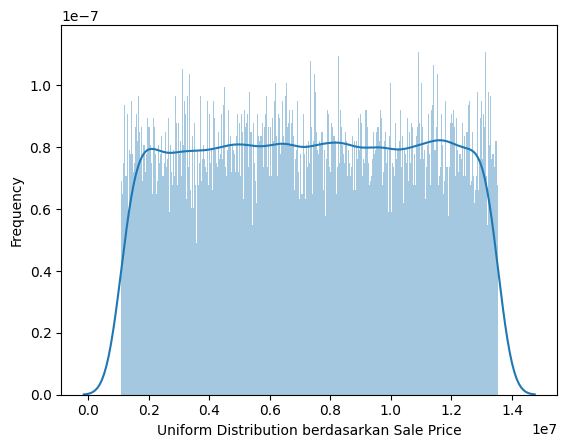

In [29]:
from scipy.stats import uniform
Tot_uniform = uniform.rvs(size=55664, loc = 1067301, scale=12471300)
sns.distplot(Tot_uniform,
             bins=1000)
plt.xlabel('Uniform Distribution berdasarkan Sale Price')
plt.ylabel('Frequency')
plt.show()

Text(-3.6805555555555554, 0.5, 'Frequency')

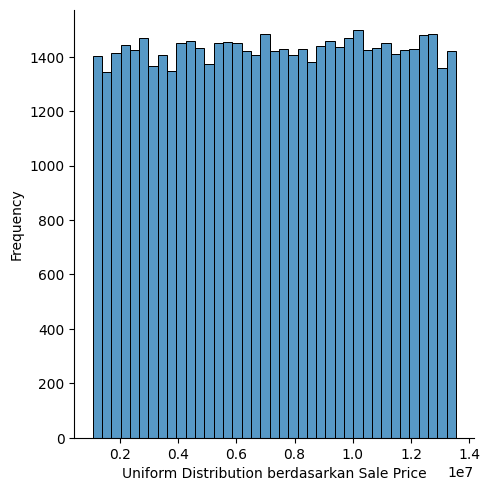

In [30]:
Tot_uni = uniform.rvs(size=55664, loc = 1067301, scale=12471300)
graph = seaborn.displot(Tot_uni)
plt.xlabel('Uniform Distribution berdasarkan Sale Price')
plt.ylabel('Frequency')

------------------------------
### b. **Normal Distribution** <br> 
Normal Distribution, juga dikenal sebagai Gaussian distribution, ada di mana-mana dalam Data Science. Kita akan menemukannya di banyak tempat terutama dalam topik inferensi statistik.

Rumus Normal Distribution adalah sebagai berikut. <br>

$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$. <br>

dengan <br>

$f(x)$ = Fungsi Kepadatan Probabilitas (FKP) <br>
$\sigma $ = Standard deviasi <br>
$\mu$ = Mean <br>
$\pi$ = 3.141592... <br>
$e$ = Natural number = 2.7182818...<br>
$x$ = Nilai variabel

**Keterangan**<br>
Untuk Normal Distribution, gunakan **norm.rvs(size= jumlah data, loc= mean, scale= standard deviasi)**

C:\Users\USER\AppData\Local\Temp\ipykernel_5420\180940845.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Tot_norm)


<Axes: xlabel='Normal Distribution berdasarkan Sale Price', ylabel='Frequency'>

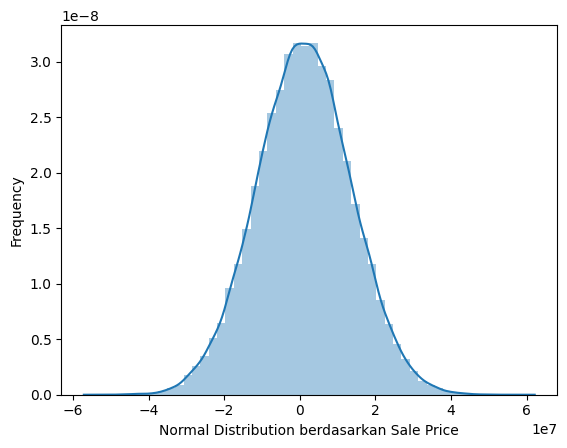

In [31]:
from scipy.stats import norm
Tot_norm = norm.rvs(size=55664, loc = 1067301, scale=12471300)
plt.xlabel('Normal Distribution berdasarkan Sale Price')
plt.ylabel('Frequency')
sns.distplot(Tot_norm)

Text(-3.8055555555555554, 0.5, 'Frequency')

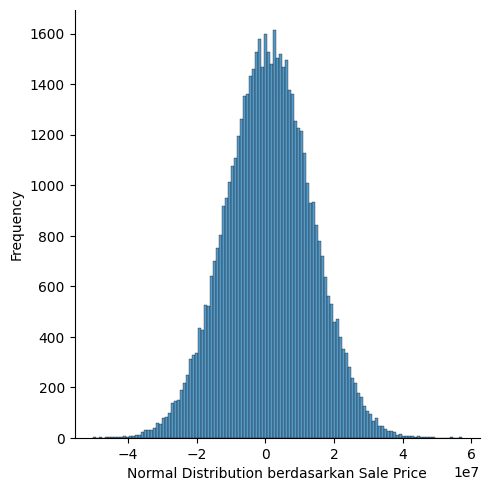

In [32]:
Tot_nor = norm.rvs(size=55664, loc = 1067301, scale=12471300)
graph = seaborn.displot(Tot_nor)
plt.xlabel('Normal Distribution berdasarkan Sale Price')
plt.ylabel('Frequency')

------------------------------
### c. **Gamma Distribution** <br>
Gamma distribution adalah two-parameter family dari continuous probability distributions. Meskipun jarang digunakan dalam bentuk mentahnya tetapi distribusi lain yang populer digunakan seperti exponential, chi-squared, erlang distributions adalah kasus khusus dari distribusi gamma.

Rumus Gamma Distribution adalah sebagai berikut. <br>
   
$ f(x;\beta;\alpha) = \left\{ \begin{array}{cl}
\frac{x^{\alpha-1}}{\beta^{\alpha}\Gamma(\alpha)}e^{-\frac{x}{\beta}}  & ; x>0 \\
\ 0 & ; x~lainnya
\end{array} \right. $. <br>

dengan <br>
$f(x;\beta;\alpha)$ = Fungsi Kepadatan Probabilitas (FKP) <br>
$\sigma = \beta \sqrt{\alpha} $ <br>
$\mu = \beta \alpha $ <br>
$\Gamma(\alpha) = (\alpha-1)!$ <br>
$e$ = Natural number = 2.7182818...<br>
$x$ = Nilai variabel <br>
    
**Keterangan**<br>
    Untuk Gamma Distribution, gunakan **gamma.rvs(size= jumlah data, a = 5)** <br>
    Diambil a = 5 sebagai puncak distribusi. <br>
    Perhatikan bahwa $\Gamma(a) = (a-1)!$ merupakan fungsi gamma sehingga apabila a = 1, akan menghasilkan fungsi berdistribusi eksponensial.

C:\Users\USER\AppData\Local\Temp\ipykernel_5420\2123381672.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Tot_gam)


<Axes: xlabel='Gamma Distribution berdasarkan Sale Price', ylabel='Frequency'>

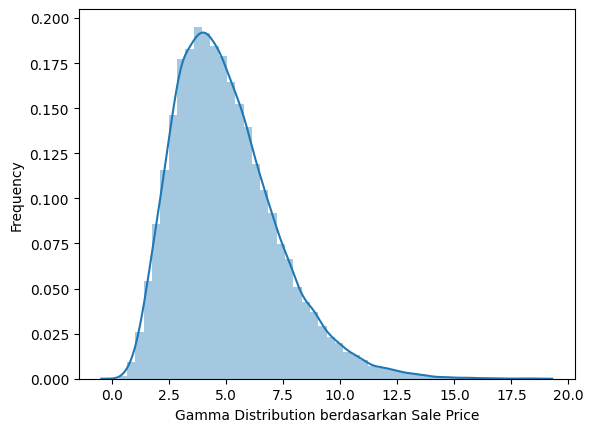

In [33]:
from scipy.stats import gamma

Tot_gam = gamma.rvs(size=55664,a=5)
plt.xlabel('Gamma Distribution berdasarkan Sale Price')
plt.ylabel('Frequency')
sns.distplot(Tot_gam)

Text(-3.8055555555555554, 0.5, 'Frequency')

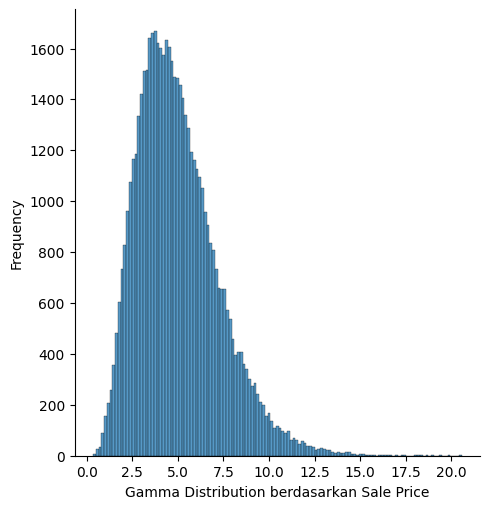

In [34]:
Tot_gamma = gamma.rvs(size=55664,a=5)
graph = seaborn.displot(Tot_gamma)
plt.xlabel('Gamma Distribution berdasarkan Sale Price')
plt.ylabel('Frequency')

---------------------------------
### d. **Exponential Distribution** <br>
Exponential distribution menggambarkan waktu antara peristiwa dalam Poisson point process, yaitu proses di mana peristiwa terjadi terus menerus dan independen pada tingkat rata-rata yang konstan.

Rumus Exponential Distribution adalah sebagai berikut. <br>

$ f(x;\lambda) = \left\{ \begin{array}{cl}
\lambda e^{-\lambda x}  & ; x\ge 0 \\
\ 0 & ; x \lt 0
\end{array} \right. $ <br>
   
dengan <br>

$f(x)$ = Fungsi Kepadatan Probabilitas (FKP) <br>
$\lambda$ = Rate parameter <br>
$x$ = Nilai variabel <br>
$e$ = Natural number = 2.7182818...<br>
  
  
**Keterangan** <br>
Untuk Exponential Distribution, gunakan **expon.rvs(size = jumlah data, loc = mean, scale = standard deviasi)**

In [35]:
from scipy.stats import expon

C:\Users\USER\AppData\Local\Temp\ipykernel_5420\63933053.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Tot_expon)


<Axes: xlabel='Exponential Distribution berdasarkan Sale Price', ylabel='Frequency'>

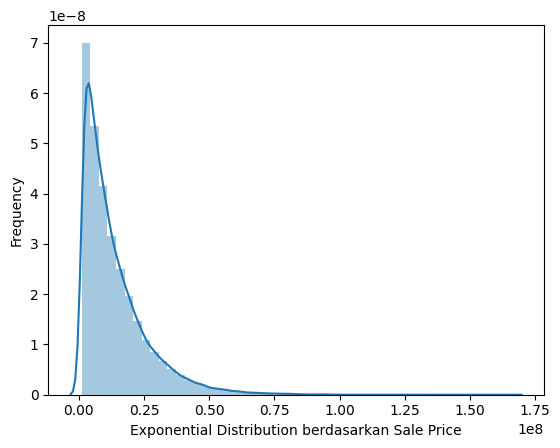

In [36]:
Tot_expon= expon.rvs(size = 55664, loc = 1067301, scale = 12471300)
plt.xlabel('Exponential Distribution berdasarkan Sale Price')
plt.ylabel('Frequency')
sns.distplot(Tot_expon)

Text(-3.6805555555555554, 0.5, 'Frequency')

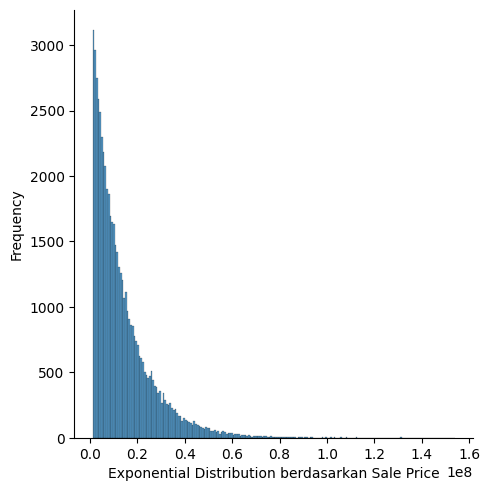

In [37]:
Tot_exp = expon.rvs(size = 55664, loc = 1067301, scale = 12471300)
graph = seaborn.displot(Tot_exp)
plt.xlabel('Exponential Distribution berdasarkan Sale Price')
plt.ylabel('Frequency')

---------------------------------------------
### e. **Poisson Distribution** <br>
Poisson Distribution merupakan suatu discrete probability distribution yang memenuhi kriteria berikut:
1) Random variable x merepresentasikan banyaknya kemunculan suatu event dalam interval waktu tertentu.
2) Nilai probability untuk kemunculan event adalah sama untuk setiap interval.
3) Jumlah kemunculan event pada suatu interval adalah independent terhadap jumlah kemunculan event pada interval lainnya.

Rumus Poisson DistributioN adalah sebagai berikut. <br>
$p(x) = P(X=x) = \frac{e^{-\lambda}\lambda^{x}}{x!}$ <br> 
dengan :<br>
X = 0,1,2... <br>
$\mu = \lambda$ <br>
$\sigma = \sqrt{\lambda}$
    
**Keterangan**<br>
Untuk Poisson Distribution, gunakan **poisson.rvs(size = jumlah data, mu = standard deviasi)**

C:\Users\USER\AppData\Local\Temp\ipykernel_5420\2911409478.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Tot_pois)


<Axes: xlabel='Poisson Distribution berdasarkan Sale Price', ylabel='Frequency'>

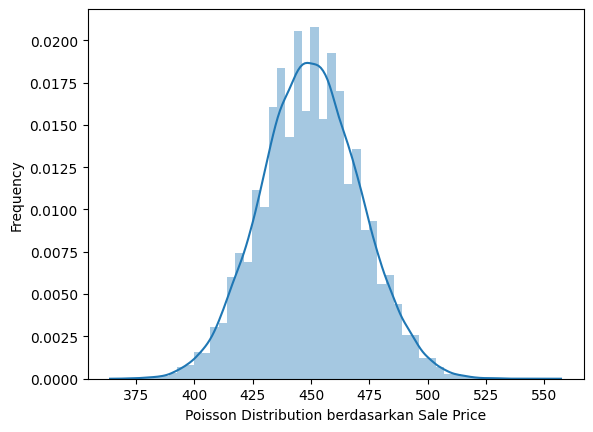

In [38]:
from scipy.stats import poisson
Tot_pois = poisson.rvs(size=55664,mu=450)
plt.xlabel('Poisson Distribution berdasarkan Sale Price')
plt.ylabel('Frequency')
sns.distplot(Tot_pois)

Text(-3.6805555555555554, 0.5, 'Frequency')

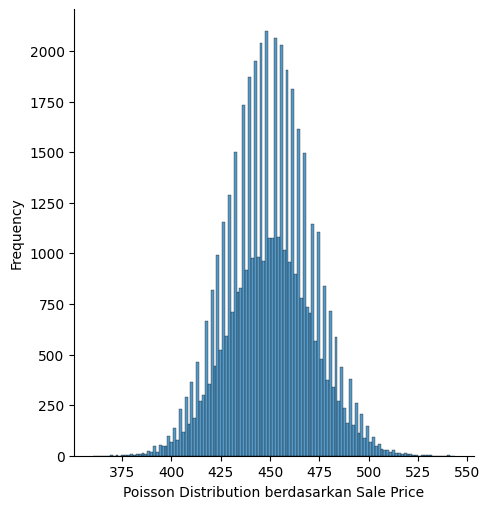

In [39]:
Tot_po = poisson.rvs(size=55664,mu=450)
graph = seaborn.displot(Tot_po)
plt.xlabel('Poisson Distribution berdasarkan Sale Price')
plt.ylabel('Frequency')

### **Kesimpulan**
1. **Uniform Distribution** <br>
    uniform.rvs(size=55664, loc = 1067301, scale=12471300) <br>
    Memiliki grafik seperti gambar diatas. <br>
    
    
2. **Normal Distribution** <br>
    norm.rvs(size=55664, loc = 1067301, scale=12471300) <br>
    Memiliki grafik seperti gambar diatas.<br>
 
 
3. **Gamma Distribution** <br> 
    gamma.rvs(size=55664,a=5) <br>
    Memiliki grafik seperti gambar diatas<br>


4. **Eksponensial Distribution** <br>
    expon.rvs(size = 55664, loc = 1067301, scale = 12471300) <br>
    Memiliki grafik seperti gambar diatas.<br>
 
 
5. **Poisson Distribution** <br>
    poisson.rvs(size=55664,mu=450) <br>
    Memiliki grafik seperti gambar diatas.

##  4. Binomial dan Bernoulli Distribution pada kolom building class category : RENTALS - WALKUP APARTMENTS        

### a) **Binomial Distribution** <br>
Distribusi di mana hanya dua hasil yang mungkin, seperti sukses atau gagal, untung atau rugi, menang atau kalah dan di mana probabilitas keberhasilan dan kegagalan sama untuk semua percobaan disebut Binomial Distribution. 

Rumus peluang data berdistribusi binomial sebagai berikut. <br>

$f(x) = \frac{n!}{(n-x)!}p^{x}q^{n-x}$ <br>
<br>
dengan <br>
n = jumlah percobaan <br>
p = peluang sukses <br>
q = peluang gagal <br>
n = jumlah data yang dipilih <br>
x = total data keseluruhan

Pada kasus ini, saya menggunakan <br>
n = BUILDING CLASS CATEGORY (TWO FAMILY DWELLINGS)

In [40]:
df['BUILDING CLASS CATEGORY'].value_counts().head()

BUILDING CLASS CATEGORY
01 ONE FAMILY DWELLINGS                        17963
02 TWO FAMILY DWELLINGS                        15588
03 THREE FAMILY DWELLINGS                       4312
07 RENTALS - WALKUP APARTMENTS                  3311
10 COOPS - ELEVATOR APARTMENTS                  3162
Name: count, dtype: int64


Menghitung nilai $ p = \frac{n}{x} $, dimana

    n = TWO FAMILY DWELLINGSS = 15588
    x = total data = 55664

In [41]:
P = 15588/55664
P

0.28003736705949983

In [42]:
Q = 1 - P
Q 

0.7199626329405002

Membuat grafik binomial distribution <br>
**binom.rvs(n = jumlah data yang dipilih, p = nilai p, size = total data)**

C:\Users\USER\AppData\Local\Temp\ipykernel_5420\707331251.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(FD_binom)


<Axes: xlabel='Binomial Distribution BUILDING CLASS CATEGORY (TWO FAMILY DWELLINGS)', ylabel='Frequency'>

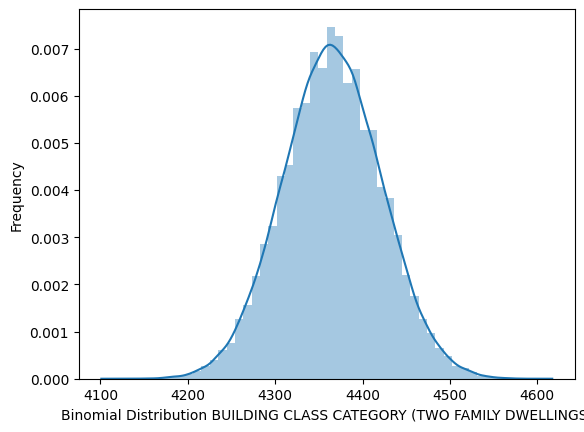

In [43]:
from scipy.stats import binom
FD_binom = binom.rvs(n = 15588,p=0.28003736705949983, size=55664)
plt.xlabel('Binomial Distribution BUILDING CLASS CATEGORY (TWO FAMILY DWELLINGS)')
plt.ylabel('Frequency')
sns.distplot(FD_binom)

Text(-3.8055555555555554, 0.5, 'Frequency')

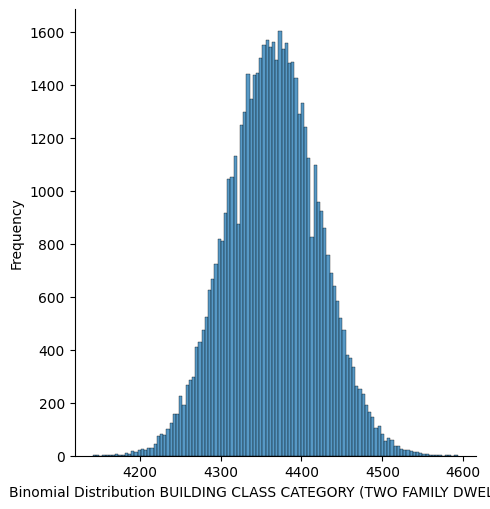

In [44]:
FD_Binom = binom.rvs(n = 15588,p=0.28003736705949983, size=55664)
graph = seaborn.displot(FD_Binom)
plt.xlabel('Binomial Distribution BUILDING CLASS CATEGORY (TWO FAMILY DWELLINGS)')
plt.ylabel('Frequency')

**Kesimpulan : Binomial Distribution**

|Nilai n|Nilai x|Nilai P|Nilai Q|
|:------|:------|:------|:------|
|15588|55664|0.28003736705949983|0.7199626329405002|
    
Ket : <br>
n : total BUILDING CLASS CATEGORY (TWO FAMILY DWELLINGS) <br>
y : total data keseluruhan

### **b) Bernoulli Distribution** <br>
Bernoulli distribution hanya memiliki dua kemungkinan hasil, yaitu berhasil (1) dan gagal (0).
    
Rumus Bernoulli Distribution <br>
$f(k;p)=pk+(1-p)(1-k)$ <br>
dengan <br>
p	=	probability <br>
k	=	possible outcomes <br>
f	=	probability mass function

Pada Bernoulli distribution, saya menggunakan data yang sama dengan Binomial Distribution. <br>
$ p = \frac {n}{x} $ <br>

$ p = \frac {15588}{55664} $ <br>

$ p = 0.28003736705949983 $

Membuat grafik bernoulli distribution <br>
**bernoulli.rvs(size = total data, p = nilai p)**

C:\Users\USER\AppData\Local\Temp\ipykernel_5420\3483442592.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(FD_Berno)


<Axes: xlabel='Bernoulli Distribution BUILDING CLASS CATEGORY (TWO FAMILY DWELLINGS)', ylabel='Density'>

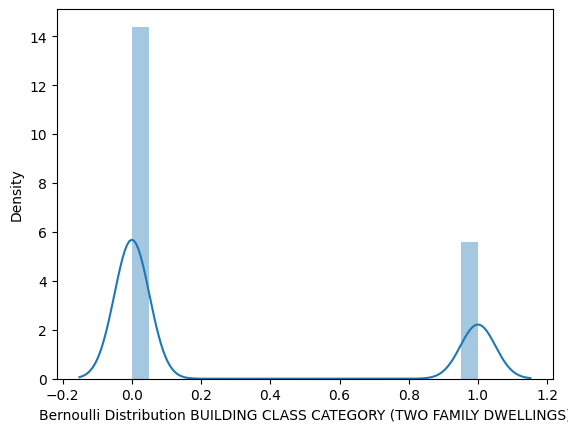

In [45]:
from scipy.stats import bernoulli
FD_Berno = bernoulli.rvs(size=55664,p=0.28003736705949983)
plt.xlabel('Bernoulli Distribution BUILDING CLASS CATEGORY (TWO FAMILY DWELLINGS)')
plt.ylabel('Density')
sns.distplot(FD_Berno)

Text(-12.430555555555555, 0.5, 'Density')

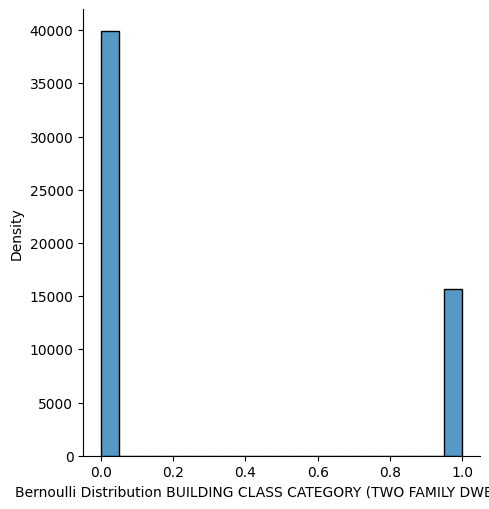

In [46]:
FD_Berno = bernoulli.rvs(size=55664,p=0.28003736705949983)
graph = seaborn.displot(FD_Berno)
plt.xlabel('Bernoulli Distribution BUILDING CLASS CATEGORY (TWO FAMILY DWELLINGS)')
plt.ylabel('Density')

**Kesimpulan : Bernoulli Distribution**

|Nilai n|Nilai x|Nilai P|Nilai Q|
|:------|:------|:------|:------|
|15588|55664|0.28003736705949983|0.7199626329405002|
    
Ket : <br>
n : total BUILDING CLASS CATEGORY (TWO FAMILY DWELLINGS) <br>
y : total data keseluruhan

## 5. Confidence Interval.

Confidence interval = $\mu \pm (z_{score} * se)$ <br>
se = $\frac{\sigma}{\sqrt{n}}$. <br>

Berikut parameter-parameter yang digunakan.
- $\mu$ = rata-rata 
- $z_{score}$ = nilai z
- se = standar error for mean
- $\sigma$ = standard deviasi
- $n$ = jumlah keseluruhan data 


#### Confidence Interval for mean
Akan ditunjukkan confidence interval for mean berdasarkan data wilayah Manhattan dan Sale Price.

In [47]:
df.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})

C:\Users\USER\AppData\Local\Temp\ipykernel_5420\1317625583.py:1: FutureWarning: The provided callable <function mean at 0x0000025DBAA2D800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})
C:\Users\USER\AppData\Local\Temp\ipykernel_5420\1317625583.py:1: FutureWarning: The provided callable <function std at 0x0000025DBAA2D9E0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})


SALE PRICE                     
                       mean           std   size
BOROUGH                                         
Bronx          6.061231e+05  2.820688e+06   6854
Brooklyn       8.550940e+05  3.988295e+06  23392
Manhattan      1.150410e+07  6.943386e+07   1638
Queens         7.599055e+05  3.002701e+06  16973
Staten Island  5.159248e+05  4.103279e+05   6807

In [48]:
# Calculate formula for CI
Manhattan_mean = 1.150410e+07
Manhattan_sd = 6.943386e+07        
Manhattan_n = 1638          
z = 1.96

In [49]:
# menghitung standar error for mean
se = Manhattan_sd / np.sqrt(Manhattan_n)
print('Diperoleh nilai standar error for mean = ', se) 

Diperoleh nilai standar error for mean =  1715593.3759380856


In [50]:
print('Diperoleh lower limit of the CI = ', Manhattan_mean - z * se)
print('Diperoleh upper limit of the CI =', Manhattan_mean + z * se)

Diperoleh lower limit of the CI =  8141536.983161353
Diperoleh upper limit of the CI = 14866663.016838647


**Kesimpulan**

Berdasarkan perhitungan diatas, diperoleh hasil sebagai berikut. <br>
Confidence interval for mean = $\mu \pm (z_{score} * se)$ 
- $\mu - (z_{score} * se) = 8141536.983 \approx 8141537$
- $\mu + (z_{score} * se) = 14866663.016 \approx 14866663$

## 5. Hypothesis Testing

Hypothesis Testing (Difference in Population Means):
<br>Apakah rata-rata Gross Square Feet di Queens lebih tinggi secara signifikan daripada rata-rata Gross Square di Brooklyn?.

$μ_1$ : Rata-rata commercial units di Manhattan <br>
$μ_2$ : Rata-rata commercial units di Staten Island <br>
Null Hypothesis $(H_0)$ : $μ_1=μ_2$ <br>
Alternative Hypothesis $(H_1)$ : $μ_1≠μ_2$

In [51]:
df.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,5,0,5,1633.0,6440.0,1900,2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,28,3,31,4616.0,18690.0,1900,2,480000.0,2016-12-14


In [52]:
df['BOROUGH'].value_counts().head()

BOROUGH
Brooklyn         23392
Queens           16973
Bronx             6854
Staten Island     6807
Manhattan         1638
Name: count, dtype: int64

In [53]:
brk = df[df["BOROUGH"] == 'Brooklyn']
que = df[df["BOROUGH"] == 'Queens']

In [54]:
n1 = len(brk)
mean1 = brk['GROSS SQUARE FEET'].mean()
std1 = brk['GROSS SQUARE FEET'].std()

(n1, mean1, std1)

(23392, 2509.748204514364, 14993.212075477884)

In [55]:
n2 = len(que)
mean2 = que['GROSS SQUARE FEET'].mean()
std2 = que['GROSS SQUARE FEET'].std()

(n2, mean2, std2)

(16973, 3269.04165439227, 42559.82622506552)

In [56]:
import statsmodels.api as sm

In [57]:
sm.stats.ztest(brk['GROSS SQUARE FEET'].dropna(), que['GROSS SQUARE FEET'].dropna(),alternative='two-sided')

(-2.521500673223188, 0.011685545186674149)

**Kesimpulan**

Pertimbangkan significance level alpha adalah 5% atau 0.05. Sehingga berdasarkan perhitungan tersebut, karena p-value (0.011685545186674149) kurang dari alpha $ (p_{value} < \alpha) $, kita dapat reject the Null hypothesis bahwa rata-rata gross square feet di Brooklyn = rata-rata gross square feet di Queens. <br>

Catatan : kita menggunakan alternative = "two-sided" dalam z-test karena di sini kita memeriksa ketidaksamaan.